In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
#显示中文、正负号
plt.rc('font', family='Microsoft YaHei', size=18)
plt.rcParams['axes.unicode_minus'] = False
#风格设定
plt.style.use('ggplot')

In [3]:
data = pd.read_csv(r'E:/数据分析数据集/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# 清洗数据
pd.set_option('display.max_columns',None)
data.dropna(axis=0,how='any',inplace=True)
data['Year'] = pd.to_datetime(data['Year'],format='%Y')
data['Year'] = data['Year'].apply(lambda x:x.year)
data.drop('Rank',axis=1,inplace=True)

In [9]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


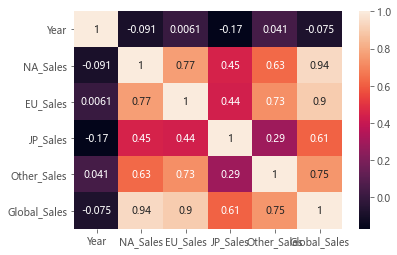

In [10]:
#热力图
matrix = data.corr()
sns.heatmap(matrix,annot=True)
plt.xticks(rotation=0)
plt.show()

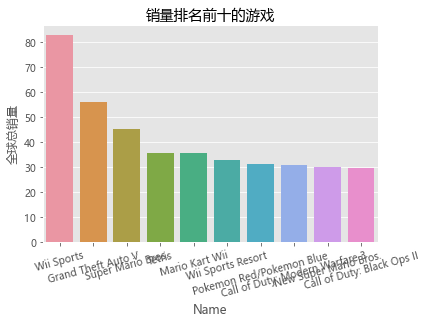

In [11]:
#销量排名前十的游戏
rank = data.groupby('Name').Global_Sales.sum().reset_index().sort_values('Global_Sales',ascending=False).head(10)
sns.barplot(x='Name',y='Global_Sales',data=rank)
plt.xticks(rotation=15)
plt.ylabel('全球总销量')
plt.title('销量排名前十的游戏')
plt.show()

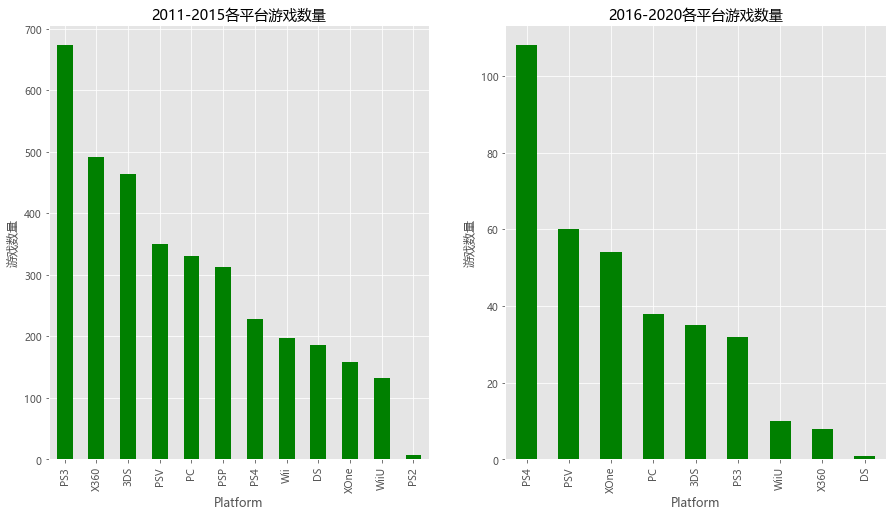

In [13]:
#平台变更
first_5 = data[(data['Year']==2011)|(data['Year']==2012)|(data['Year']==2013)|(data['Year']==2014)|(data['Year']==2015)]
last_5 = data[(data['Year']==2016)|(data['Year']==2017)|(data['Year']==2018)|(data['Year']==2019)|(data['Year']==2020)]
#2010-2015
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
first_5.groupby('Platform').Name.count().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('游戏数量')
plt.title('2011-2015各平台游戏数量')
plt.subplot(1,2,2)
last_5.groupby('Platform').Name.count().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('游戏数量')
plt.title('2016-2020各平台游戏数量')
plt.show()

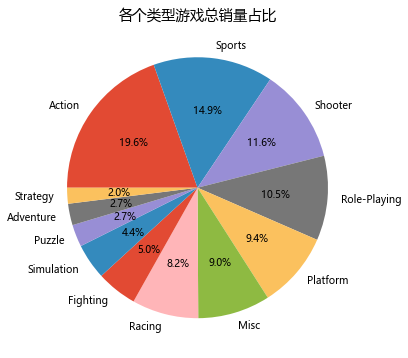

In [14]:
#各个类型游戏总销量
plt.figure(figsize=(10,6))
data.groupby('Genre').Global_Sales.sum().sort_values(ascending=False).plot.pie(autopct='%.1f%%',counterclock=False, startangle=180)
plt.ylabel('')
plt.title('各个类型游戏总销量占比')
plt.show()

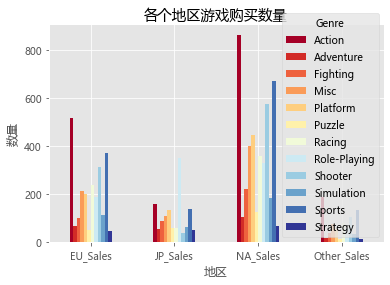

In [15]:
#各个地区各类型游戏销量
region_data = data.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],aggfunc='sum').T
region_data.plot.bar(cmap=mpl.cm.RdYlBu)
plt.title('各个地区游戏购买数量')
plt.xlabel('地区')
plt.ylabel('数量')
plt.xticks(rotation=0)
plt.show()

In [16]:
#发行厂商
publisher = data.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False)
publisher = data[data['Publisher'].isin(publisher.head(10).index)]
label = publisher.Publisher.apply(lambda x:x.split()[0])
publisher['Publisher'] = label

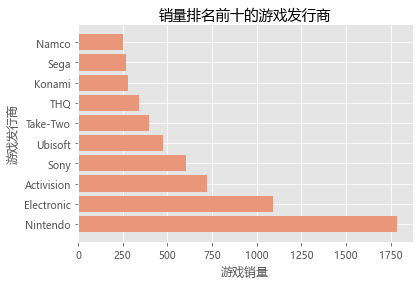

In [17]:
#销量排名前10游戏厂商
Publisher = publisher.groupby('Publisher').Global_Sales.sum().reset_index().sort_values('Global_Sales',ascending=False).reset_index(drop=True)
plt.figure(1)
plt.barh(Publisher['Publisher'],Publisher['Global_Sales'],color='darksalmon')
plt.ylabel('游戏发行商')
plt.xlabel('游戏销量')
plt.title('销量排名前十的游戏发行商')
plt.show()

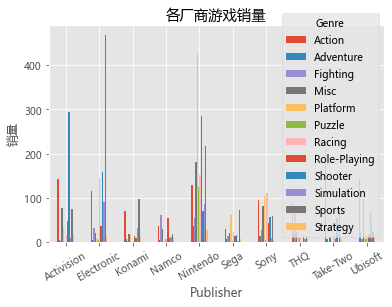

In [18]:
#发行厂商各类型游戏销量
publisher_data = publisher.pivot_table(index='Publisher',columns='Genre',values='Global_Sales',aggfunc='sum')
publisher_data.plot.bar()
plt.title('各厂商游戏销量')
plt.ylabel('销量')
plt.xticks(rotation=30)
plt.show()